# Imports & Constants

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

RESULTS_DIR = "./results/"
RANDOM_AGENT_AVG = 10.90
HUMAN_BASELINE_AVG = 24.56

# Join the CSV Files

In [2]:
files = [f for f in os.listdir(RESULTS_DIR) if f.endswith(".csv")]

In [3]:
# Init a df for storing all the results
combined_df = pd.DataFrame()

for filename in files:
    file_path = os.path.join(RESULTS_DIR, filename)

    # Read the CSV into a dataframe
    temp_df = pd.read_csv(file_path, index_col=0)
    temp_df.reset_index(drop=True, inplace=True)

    # Append the tmp df to the main df.
    combined_df = pd.concat([combined_df, temp_df], axis=1, sort=False)

# Analysis & Plot

In [4]:
method_to_score = {
    'Random Agent': RANDOM_AGENT_AVG,
    'Human': HUMAN_BASELINE_AVG,
    'DQN*': 26.43,
    'Double DQN*': 27.83,
    'DQN with PER*': 33.17,
    'Dueling DQN*': 28.74,
    'Categorical DQN*': 30.11,
    'Noisy DQN': 32.46,
    'N-step DQN*': 28.27,
    'Rainbow DQN': 37.92,
    'PPO': 36.67
}

In [5]:
# Get the minimum number of episodes
min_col_length = combined_df.count().min()

# Truncate the df to the minimum number of episodes experienced.
truncated_df = combined_df.iloc[:min_col_length]

# Calculate the rolling mean.
rolling_mean_df = truncated_df.rolling(400).mean()

# Sort the columns in order of descending total score.
sorted_df = rolling_mean_df[rolling_mean_df.sum().sort_values(ascending=False).index]

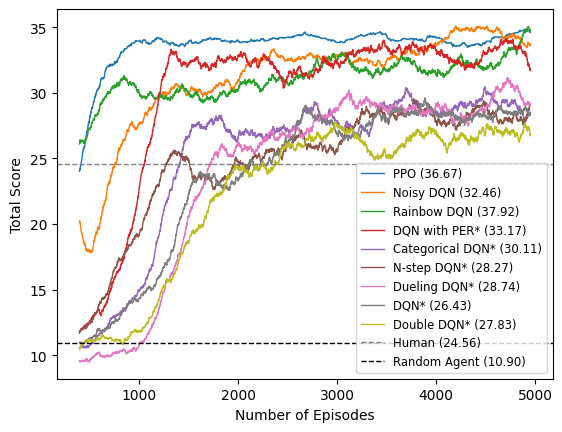

In [6]:
ax_full = sorted_df.plot(linewidth=1)

# Plot a horizontal dotted line for the human baseline
random_agent_line = ax_full.axhline(y=HUMAN_BASELINE_AVG, color='grey', linestyle='--', linewidth=1, label='Human')
# Plot a horizontal dotted line for the random agent
random_agent_line = ax_full.axhline(y=RANDOM_AGENT_AVG, color='black', linestyle='--', linewidth=1, label='Random Agent')

# Set y- and x-axis labels
ax_full.set_xlabel("Number of Episodes")
ax_full.set_ylabel("Total Score")

# Create a legend with the existing line objects plus the random agent line
handles, labels = ax_full.get_legend_handles_labels()
adjusted_labels = [
    f'{label} ({method_to_score[label]:.2f})' 
    
    for label in labels
]

# Create a legend with a smaller font size and adjusted labels
ax_full.legend(handles=handles, labels=adjusted_labels, fontsize='small')
# Other options: 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large'

plt.show()

## Plot a simplified graph

In [36]:
filtered_df = sorted_df[['PPO', 'Rainbow DQN', 'DQN*']]
colours = ["blue", "green", "grey"]

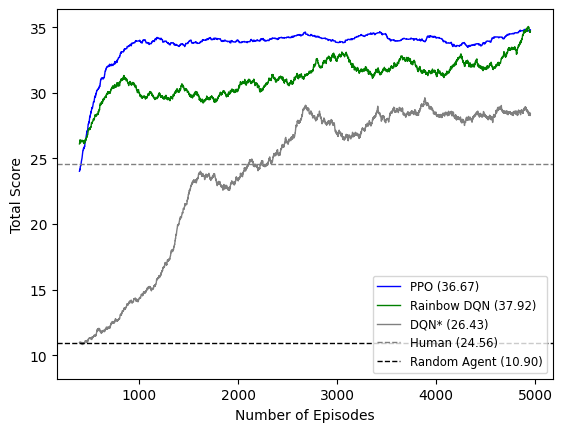

In [41]:
ax_simp = filtered_df.plot(linewidth=1, color=colours)

# Match the y-axis of this graph with the y-axis of the one before.
y_min, y_max = ax_full.get_ylim()
ax_simp.set_ylim([y_min, y_max])

# Plot a horizontal dotted line for the human baseline
random_agent_line = ax_simp.axhline(y=HUMAN_BASELINE_AVG, color='grey', linestyle='--', linewidth=1, label='Human')
# Plot a horizontal dotted line for the random agent
random_agent_line = ax_simp.axhline(y=RANDOM_AGENT_AVG, color='black', linestyle='--', linewidth=1, label='Random Agent')

# Set y- and x-axis labels
ax_simp.set_xlabel("Number of Episodes")
ax_simp.set_ylabel("Total Score")

# Create a legend with the existing line objects plus the random agent line
handles, labels = ax_simp.get_legend_handles_labels()
adjusted_labels = [
    f'{label} ({method_to_score[label]:.2f})' 
    for label in labels
]

# Create a legend with a smaller font size and adjusted labels
ax_simp.legend(handles=handles, labels=adjusted_labels, fontsize='small')

plt.show()

# Plot test results as a bar chart

In [18]:
methods = ['Random', 'Human Agent', 'DQN', 'D-DQN', 'DQN-PER', 'Dueling DQN', 'Cat. DQN', 'Noisy DQN', 'N-Step DQN', 'Rainbow DQN', 'PPO']
scores = [RANDOM_AGENT_AVG, HUMAN_BASELINE_AVG, 26.43, 27.83, 33.17, 28.74, 30.11, 32.46, 28.27, 37.92, 36.67] 
colours = ['grey', 'yellow', 'red', 'pink', 'purple', 'orange', 'brown', 'green', 'blue']

In [21]:
methods_clean = [m for m, s in zip(methods, scores) if s is not None]
scores_clean = [s for s in scores if s is not None]
colours_clean = [c for s, c in zip(scores, colours) if s is not None]

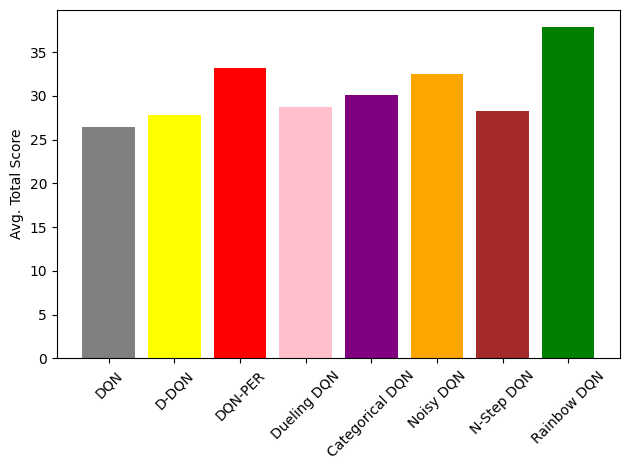

In [24]:
# Plot the bar chart
# plt.figure(figsize=(12, 8))
plt.bar(methods_clean, scores_clean, color=colours_clean)
# plt.xlabel('Method')
plt.ylabel('Avg. Total Score')
# plt.title('Average Scores per Episode Averaged Over 200 Episodes for Each DRL Agent')
plt.xticks(rotation=45)  # Rotate method names for better readability
plt.tight_layout()  # Adjust layout to make room for rotated method names

# Show the plot
plt.show()